In [1]:
# Importing necessary libraries
# Warnings are ignored for simplicity
import warnings
warnings.filterwarnings('ignore')

# Libraries for numerical and data analysis
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets

# Libraries for data visualization
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For advanced visualizations

# Library for calculating similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity  # For cosine similarity

# Library for evaluating model performance
from sklearn.metrics import mean_squared_error  # For calculating error

# Library for working with sparse matrices
from scipy.sparse.linalg import svds  # For matrix factorization



In [2]:
# Importing the dataset
# Note: The dataset has no headers in the file
import pandas as pd  # Ensure pandas is imported for working with dataframes

# Reading the dataset (modify the file path as per your system)
df = pd.read_csv('ratings_Electronics.csv', header=None)

# Adding column names to make the data easier to understand
df.columns = ['user_id', 'prod_id', 'rating', 'timestamp']

# Removing the 'timestamp' column as it's not needed for analysis
df = df.drop('timestamp', axis=1)

# Creating a copy of the dataframe for backup or future use
df_copy = df.copy()


In [3]:
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  7824482
No of columns =  3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   prod_id  object 
 2   rating   float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [5]:
df.isna().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

In [6]:
df['rating'].describe()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

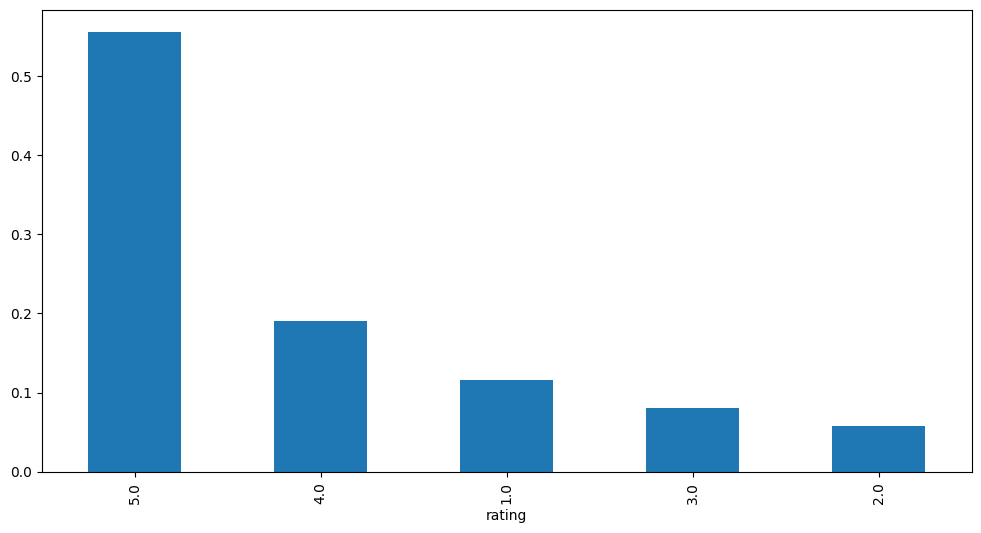

In [7]:
# Creating a bar plot to visualize the distribution of ratings

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the value counts of ratings as a bar chart
# value_counts(1) calculates the proportion of each rating
df['rating'].value_counts(normalize=True).plot(kind='bar')

# Display the plot
plt.show()


In [8]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['prod_id'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


In [9]:
# Find the top 10 users based on the number of ratings they have given

# Group the data by 'user_id' and count the number of ratings for each user
user_ratings_count = df.groupby('user_id').size()

# Sort the counts in descending order to get the most active users
most_rated = user_ratings_count.sort_values(ascending=False).head(10)

# Display the top 10 users based on the number of ratings
most_rated


user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [10]:
# Filter users who have given 50 or more ratings

# Count the number of ratings for each user
counts = df['user_id'].value_counts()

# Find users who have given 50 or more ratings
active_users = counts[counts >= 50].index

# Filter the original dataframe to include only those users
df_final = df[df['user_id'].isin(active_users)]


In [11]:
# Displaying the number of observations, unique users, and unique products in the filtered data

# Total number of rows (observations) in the final dataset
print('The number of observations in the final data =', len(df_final))

# Count of unique users in the final dataset
print('Number of unique USERS in the final data =', df_final['user_id'].nunique())

# Count of unique products in the final dataset
print('Number of unique PRODUCTS in the final data =', df_final['prod_id'].nunique())


The number of observations in the final data = 125871
Number of unique USERS in the final data = 1540
Number of unique PRODUCTS in the final data = 48190


In [12]:
# Creating the interaction matrix of products and users based on ratings
# Rows represent users, columns represent products, and values represent ratings
# Missing values (NaN) are replaced with 0 to indicate no rating
final_ratings_matrix = df_final.pivot(index='user_id', columns='prod_id', values='rating').fillna(0)

# Printing the shape of the interaction matrix
print('Shape of final_ratings_matrix:', final_ratings_matrix.shape)

# Counting the number of non-zero entries in the interaction matrix
# These represent the actual ratings given by users
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('Given number of ratings:', given_num_of_ratings)

# Calculating the total possible number of ratings
# This is the product of the number of users (rows) and products (columns)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('Possible number of ratings:', possible_num_of_ratings)

# Calculating the density of the ratings
# Density is the percentage of given ratings out of all possible ratings
density = (given_num_of_ratings / possible_num_of_ratings) * 100
print('Density: {:.2f}%'.format(density))

# Displaying the first few rows of the interaction matrix
final_ratings_matrix.head()


Shape of final_ratings_matrix: (1540, 48190)
Given number of ratings: 125871
Possible number of ratings: 74212600
Density: 0.17%


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Step 1: Calculate the average rating for each product
# Group the data by 'prod_id' and calculate the mean of the 'rating' column
average_rating = df_final.groupby('prod_id')['rating'].mean()

# Step 2: Calculate the count of ratings for each product
# Group the data by 'prod_id' and count the number of ratings
count_rating = df_final.groupby('prod_id')['rating'].count()

# Step 3: Create a new dataframe to store the calculated values
# 'avg_rating' contains the average rating, and 'rating_count' contains the count of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

# Step 4: Sort the dataframe by the average rating in descending order
final_rating = final_rating.sort_values(by='avg_rating', ascending=False)

# Step 5: Display the top 5 products based on their average rating
final_rating.head()


,avg_rating,rating_count
prod_id,,
0594451647,5.0,1
B003RRY9RS,5.0,1
B003RR95Q8,5.0,1
B003RIPMZU,5.0,1
B003RFRNYQ,5.0,2


In [14]:
# Defining a function to get the top 'n' products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):
    
    # Step 1: Filter products that have more than the minimum required number of interactions (ratings)
    recommendations = final_rating[final_rating['rating_count'] > min_interaction]
    
    # Step 2: Sort the remaining products by their average rating in descending order
    recommendations = recommendations.sort_values('avg_rating', ascending=False)
    
    # Step 3: Return the top 'n' product IDs based on the highest average ratings
    return recommendations.index[:n]


In [15]:
list(top_n_products(final_rating, 5, 50))

['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

In [16]:
list(top_n_products(final_rating, 5, 100))

['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']

In [17]:
final_ratings_matrix.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Adding a new column 'user_index' to store the index for each user
# np.arange(0, final_ratings_matrix.shape[0]) generates a sequence of integers starting from 0 to the number of rows
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])

# Setting 'user_index' as the new index for the dataframe
# This makes it easier to reference each user by a unique integer index
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Displaying the first few rows of the updated ratings matrix with 'user_index'
final_ratings_matrix.head()


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Defining a function to find similar users based on cosine similarity
def similar_users(user_index, interactions_matrix):
   
    # Initialize an empty list to store the similarity scores
    similarity = []
    
    # Loop through all users in the interactions matrix (each row represents a user)
    for user in range(0, interactions_matrix.shape[0]):  # .shape[0] gives the number of rows (users)
        
        # Calculate cosine similarity between the given user and each other user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        # Append the user index and similarity score as a tuple
        similarity.append((user, sim))
    
    # Sort the similarity list by the similarity score in descending order
    similarity.sort(key=lambda x: x[1], reverse=True)
    
    # Extract the most similar users and their similarity scores from the sorted list
    most_similar_users = [tup[0] for tup in similarity]  # Extract user indices
    similarity_score = [tup[1] for tup in similarity]  # Extract similarity scores
    
    # Remove the original user and its similarity score from the lists
    most_similar_users.remove(user_index)  # Remove the given user
    similarity_score.remove(similarity_score[0])  # Remove the similarity score of the given user
    
    # Return the lists of most similar users and their similarity scores
    return most_similar_users, similarity_score


In [20]:
# Get the most similar users to the user with index 3 in the final_ratings_matrix
# The function returns a tuple, and we're selecting the first 10 similar users
similar = similar_users(3, final_ratings_matrix)[0][0:10]

# Display the result
similar


[320, 12, 793, 261, 156, 1493, 1250, 567, 753, 1360]

In [21]:
#Print the similarity score
similar_users(3,final_ratings_matrix)[1][0:10]

[array([[0.05662371]]),
 array([[0.05549645]]),
 array([[0.05098326]]),
 array([[0.05024185]]),
 array([[0.05003874]]),
 array([[0.04930111]]),
 array([[0.04889354]]),
 array([[0.04672744]]),
 array([[0.04637283]]),
 array([[0.04492668]])]

In [22]:
similar = similar_users(1521, final_ratings_matrix)[0][0:10]
similar
     

[991, 1065, 1012, 1402, 1371, 1278, 1518, 692, 785, 161]

In [23]:
#Print the similarity score
similar_users(1521,final_ratings_matrix)[1][0:10]

[array([[0.10889304]]),
 array([[0.10538068]]),
 array([[0.1026758]]),
 array([[0.09418291]]),
 array([[0.09149062]]),
 array([[0.09135361]]),
 array([[0.09028898]]),
 array([[0.08735684]]),
 array([[0.08673386]]),
 array([[0.08478815]])]

In [24]:
# Defining the recommendations function to suggest products based on similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):
  
    # Step 1: Get the most similar users to the given user
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    # Step 2: Find the products that the given user has already interacted with
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    
    # Initialize an empty list to store the recommended products
    recommendations = []
    
    # Step 3: Create a set of observed interactions to avoid recommending products the user has already rated
    observed_interactions = prod_ids.copy()
    
    # Step 4: Loop through the most similar users and suggest new products
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            # Find the products rated by the similar user that the given user has not rated
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            
            # Update the observed interactions to include the new products from the similar user
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    # Step 5: Return only the top 'num_of_products' recommendations
    return recommendations[:num_of_products]


In [25]:
recommendations(3,5,final_ratings_matrix)

['B001GCQ3KM', 'B00000J1V8', 'B000CRFOMK', 'B000ENRQ3M', 'B00015Y0FK']

In [26]:
recommendations(1521,5,final_ratings_matrix)

['B008ULPE70', 'B00EU9V3S0', 'B004MF11MU', 'B005LIDN14', 'B0035JJJQE']

In [27]:
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)

In [28]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)
     

In [29]:
# Perform Singular Value Decomposition (SVD)
# U, s, Vt = svds(final_ratings_sparse, k = 50) 
# k is the number of latent features (dimensionality reduction)

U, s, Vt = svds(final_ratings_sparse, k=50)

# Construct the diagonal matrix 'sigma' from the vector 's'
# 's' contains the singular values, and we convert it into a diagonal matrix
sigma = np.diag(s)


In [30]:
U.shape

(1540, 50)

In [31]:
sigma.shape

(50, 50)

In [32]:
Vt.shape

(50, 48190)

In [33]:
# Step 1: Multiply the decomposed matrices to reconstruct the predicted ratings
# np.dot(np.dot(U, sigma), Vt) performs matrix multiplication to reconstruct the matrix of predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Step 2: Create a DataFrame from the predicted ratings and use absolute values to avoid negative ratings
# We convert the result into a DataFrame for better readability and use the column names from the original ratings matrix
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns=final_ratings_matrix.columns)

# Step 3: Display the first few rows of the predicted ratings
preds_df.head()

# Step 4: Convert the predicted ratings DataFrame into a sparse matrix format for efficiency
# csr_matrix is used to convert the DataFrame values into a sparse matrix
preds_matrix = csr_matrix(preds_df.values)


In [34]:
import numpy as np
import pandas as pd

def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):
    
    # Step 1: Get the user's ratings from the actual and predicted interaction matrices
    # Convert the sparse matrices to arrays and reshape them into 1D arrays
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)  # Actual ratings
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)  # Predicted ratings

    # Step 2: Create a DataFrame to compare actual and predicted ratings
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})

    # Step 3: Add a column for product IDs (or indices) to make the DataFrame readable
    temp['Recommended Products'] = np.arange(len(user_ratings))

    # Set the 'Recommended Products' as the index of the DataFrame for easy access
    temp = temp.set_index('Recommended Products')

    # Step 4: Filter out the products the user has already rated (actual ratings = 0 means not rated)
    temp = temp.loc[temp.user_ratings == 0]

    # Step 5: Sort the products by predicted ratings in descending order (highest predictions first)
    temp = temp.sort_values('user_predictions', ascending=False)

    # Step 6: Print the top recommended products
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))


In [35]:
#Enter 'user index' and 'num_recommendations' for the user
recommend_items(121,final_ratings_sparse,preds_matrix,5)


Below are the recommended products for user(user_id = 121):

Recommended Products
28761    2.414390
39003    1.521306
41420    1.309224
40158    1.200111
33819    1.126866
Name: user_predictions, dtype: float64


In [36]:
recommend_items(100,final_ratings_sparse,preds_matrix,10)


Below are the recommended products for user(user_id = 100):

Recommended Products
11078    1.624746
16159    1.132730
10276    1.047888
22210    0.955049
18887    0.879705
41618    0.854430
45008    0.816153
43419    0.803755
28761    0.748799
14791    0.748797
Name: user_predictions, dtype: float64


In [37]:
# Add a new column 'user_index' which contains the index values (from 0 to number of users)
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])

# Set the 'user_index' column as the index of the DataFrame
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Display the first few rows of the matrix with actual ratings
final_ratings_matrix.head()


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

prod_id
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [39]:
preds_df.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,0.061477,0.001214,0.123433,0.028490,0.016109,0.002855,0.174568,0.011367,0.012997
1,0.002286,0.010898,0.000724,0.130259,0.007506,0.003350,0.063711,0.000674,0.016111,0.002433,...,0.000038,0.013766,0.001473,0.025588,0.042103,0.004251,0.002177,0.024362,0.014765,0.038570
2,0.001655,0.002675,0.007355,0.007264,0.005152,0.003986,0.003480,0.006961,0.006606,0.002719,...,0.001708,0.051040,0.000325,0.054867,0.017870,0.004996,0.002426,0.083928,0.112205,0.005964
3,0.001856,0.011019,0.005910,0.014134,0.000179,0.001877,0.005391,0.001709,0.004968,0.001402,...,0.000582,0.009326,0.000465,0.048315,0.023302,0.006790,0.003380,0.005460,0.015263,0.025996
4,0.001115,0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,0.019347,0.012749,0.001026,0.001364,0.020580,0.011828,0.012770


In [40]:
avg_preds=preds_df.mean()
avg_preds.head()

prod_id
0594451647    0.003360
0594481813    0.005729
0970407998    0.008566
0972683275    0.035330
1400501466    0.006966
dtype: float64

In [41]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()
     

,Avg_actual_ratings,Avg_predicted_ratings
prod_id,,
0594451647,0.003247,0.003360
0594481813,0.001948,0.005729
0970407998,0.003247,0.008566
0972683275,0.012338,0.035330
1400501466,0.012987,0.006966


In [42]:
# Calculate RMSE (Root Mean Squared Error) between actual ratings and predicted ratings
RMSE = mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)

# Print the RMSE value to evaluate the performance of the SVD model
print(f'RMSE SVD Model = {RMSE} \n')


RMSE SVD Model = 0.013679389779857993 

